In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.use
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')


# load data
df = pd.read_csv('WindTurbineDesignHypervolumeMedianRun.csv')
dfmax = df.iloc[[-1]]
dfmaxt = dfmax.transpose()
dfmaxt.columns = ['median']
dfmaxt = dfmaxt.drop('FE', axis=0)

dfbest = pd.read_csv('WindTurbineDesignHypervolumeBestRun.csv')
dfmaxbest = dfbest.iloc[[-1]]
dfmaxbest = dfmaxbest.transpose()
dfmaxbest.columns = ['max']
dfmaxbest = dfmaxbest.drop('FE', axis=0)


def plot_hypervolume(algs, offsets):
    f = plt.figure(figsize=(8, 6))
    ax = f.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    colors={
        "NSGAIII": "tab:orange",
        "SPEA2SDE": "tab:green",
        "SPEA2": "tab:red",
        "CMOMBI2": "tab:purple",
        "ThetaDEA": "tab:brown",
        "CMOEAD": "tab:pink",
        "NSGAII": "tab:grey",
        "HypE": "tab:olive",
        "CHHCO": "k",
        "CHHCORandom": "tab:blue"
    }

    labels={
        "NSGAIII": "NSGA-III",
        "SPEA2SDE": "SPEA2SDE",
        "SPEA2": "SPEA2",
        "CMOMBI2": "MOMBI2",
        "ThetaDEA": "ThetaDEA",
        "CMOEAD": "MOEA/D",
        "NSGAII": "NSGA-II",
        "HypE": "HypE",
        "CHHCO": "HHCO",
        "CHHCORandom": "HHCO-rand"
    }

    for alg in algs:
        df.plot(x="FE", y=alg, ax=f.gca(), legend=False, color=colors[alg])
        plt.text(9870, dfmax[alg]+offset[alg], labels[alg], color=colors[alg], fontsize=12)
    plt.xlabel("Fitness Evaluations")
    plt.ylabel("Hypervolume")
    ax.grid(True, ls='--')
    ax.tick_params(axis='both', which='both', # labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)
    plt.show()



In [2]:
dfmaxbest.index.name = 'alg'
dfmaxbest.reset_index(inplace=True)

dfmaxt.index.name = 'alg'
dfmaxt.reset_index(inplace=True)

In [3]:
dfoverall = dfmaxbest.merge(dfmaxt, on = ['alg'], how='inner')

dfoverall.sort_values(by=['median'], inplace=True)

dfoverall = dfoverall.set_index("alg")

dfoverall

,max,median
alg,,
CMOEADD,0.314566,0.119221
HypE,0.470731,0.371032
NSGAII,0.451949,0.451949
CMOEAD,0.562005,0.494201
ThetaDEA,0.668918,0.556663
CMOMBI2,0.634919,0.581138
SPEA2,0.664635,0.583742
CHHCORandom,0.661291,0.615500
SPEA2SDE,0.663690,0.619736


Text(0,0.5,'Hypervolume')

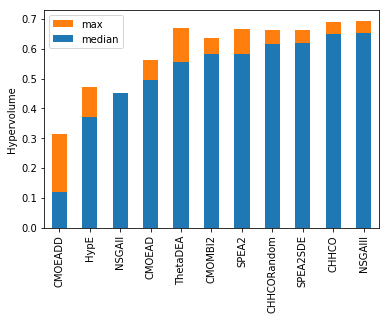

In [4]:
# Hypervolume
ax = dfoverall.plot.bar(y='max', color='tab:orange')
ax = dfoverall.plot.bar(y='median', color='tab:blue', ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Hypervolume")


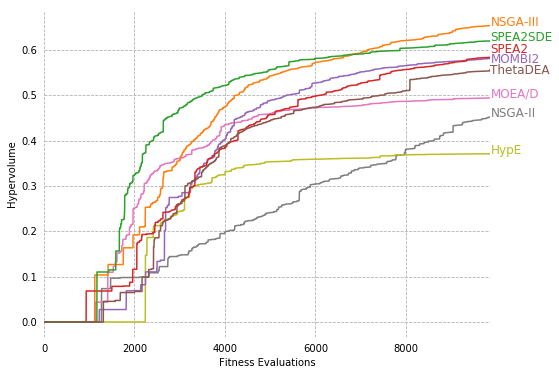

In [5]:
# MOEAs

offset={
    "NSGAIII": 0.0,
    "SPEA2SDE": 0.0,
    "SPEA2": 0.01,
    "CMOMBI2": -0.01,
    "ThetaDEA": -0.01,
    "CMOEAD": 0.00,
    "NSGAII": 0.00,
    "HypE": 0.00,
}


plot_hypervolume(["NSGAII","HypE","CMOEAD","NSGAIII","CMOMBI2","SPEA2","SPEA2SDE","ThetaDEA"], offset)

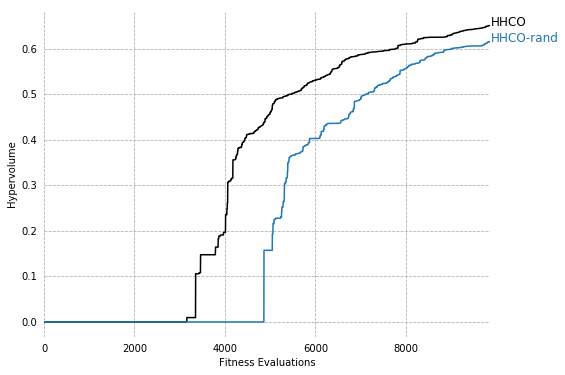

In [6]:
# HHs

offset={
    "CHHCO": 0.00,
    "CHHCORandom": 0.00
}

plot_hypervolume(["CHHCO", "CHHCORandom"], offset)

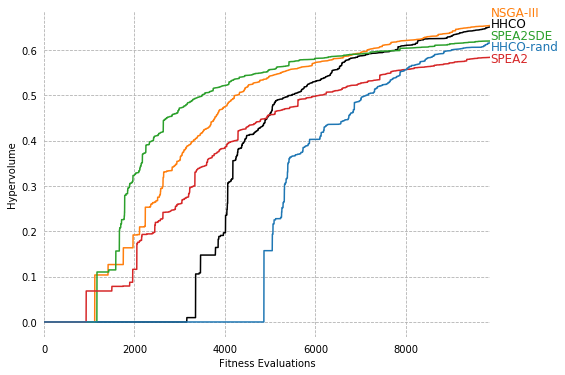

In [7]:
# best MOEAs and HHs

offset={
    "NSGAIII": 0.02,
    "SPEA2SDE": 0.005,
    "SPEA2": -0.01,
    "CMOMBI2": 0.0,
    "ThetaDEA": 0.0,
    "CMOEAD": 0.00,
    "NSGAII": 0.00,
    "HypE": 0.00,
    "CMOEADD": 0.00,
    "CHHCO": 0.00,
    "CHHCORandom": -0.015
}


plot_hypervolume(["CHHCO", "NSGAIII", "SPEA2SDE", "SPEA2", "CHHCORandom"], offset)

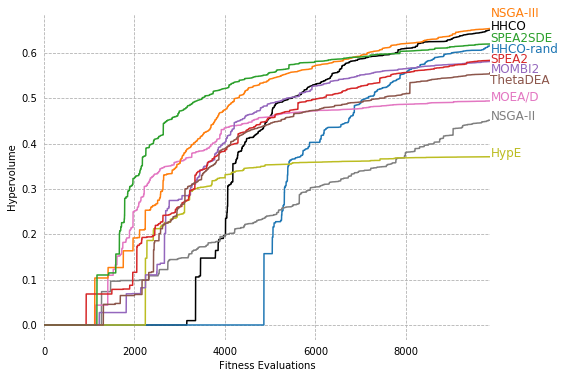

In [8]:
# all MOEAs and HHs

offset={
    "NSGAIII": 0.025,
    "SPEA2SDE": 0.005,
    "SPEA2": -0.005,
    "CMOMBI2": -0.025,
    "ThetaDEA": -0.025,
    "CMOEAD": 0.00,
    "NSGAII": 0.00,
    "HypE": 0.00,
    "CMOEADD": 0.00,
    "CHHCO": 0.00,
    "CHHCORandom": -0.015
}

algs=["CHHCO", "CHHCORandom", "NSGAII","HypE","CMOEAD","NSGAIII","CMOMBI2","SPEA2","SPEA2SDE","ThetaDEA"]
plot_hypervolume(algs, offset)